# polynomial

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


In [3]:
# fetching data
dm=pd.read_csv('total-electricity-consumption-us.csv')
dm.head()

,Year,Consumption
0,1920,57125
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651


In [4]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Year         51 non-null     int64
 1   Consumption  51 non-null     int64
dtypes: int64(2)
memory usage: 948.0 bytes


In [5]:
dm.describe()

,Year,Consumption
count,51.000000,5.100000e+01
mean,1945.000000,4.689281e+05
std,14.866069,4.455161e+05
min,1920.000000,5.365600e+04
25%,1932.500000,1.136455e+05
50%,1945.000000,2.760440e+05
75%,1957.500000,7.240135e+05
max,1970.000000,1.641731e+06


In [6]:
dm.isnull().sum()

Year           0
Consumption    0
dtype: int64

In [7]:
dm.shape

(51, 2)

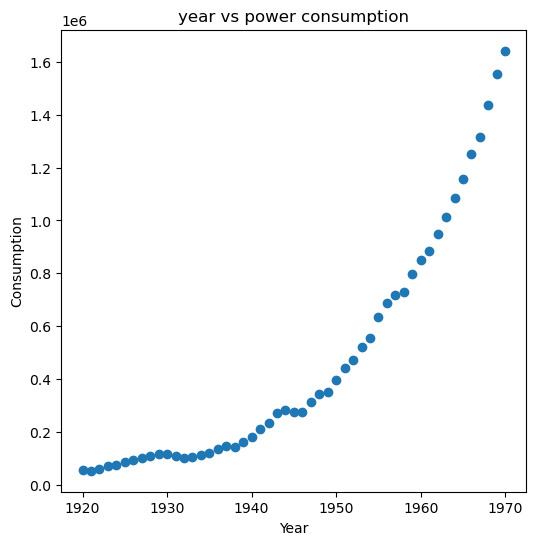

In [8]:
# YEAR VS POWER CONSUMPTION
plt.figure(figsize=(6,6))
plt.scatter(dm['Year'],dm['Consumption'])
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.title('year vs power consumption')
plt.show()

In [9]:
# splitting input and output feartures

In [10]:
x=dm['Year']
y=dm['Consumption']

In [11]:
# splitting  the  data into and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [12]:
# creating new axis for x column (convert pandas seriesb to numpy array before reshapping)
import numpy as np
x_train=x_train.to_numpy()[:,np.newaxis]
x_test=x_test.to_numpy()[:,np.newaxis]


In [13]:
# APPLYING POLYNOMIAL REGRESSION

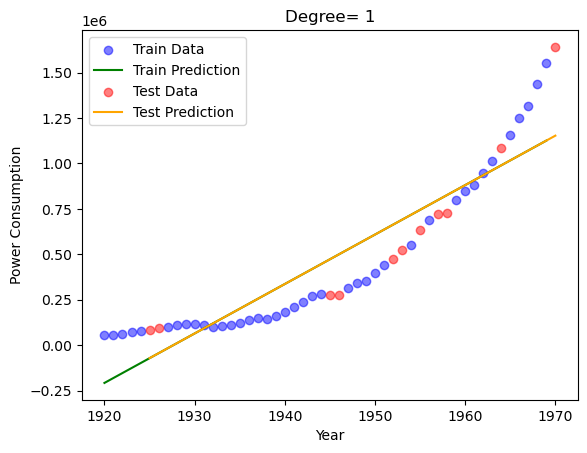

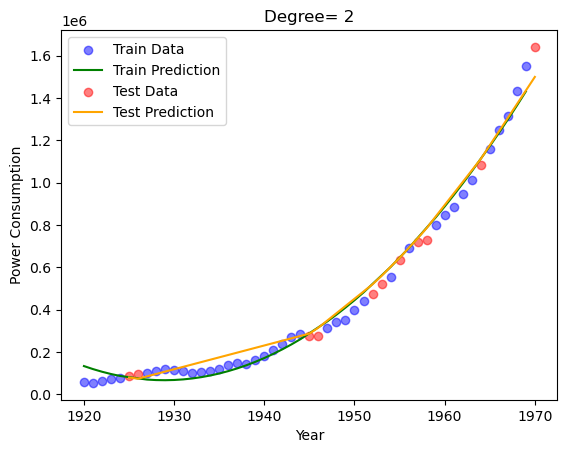

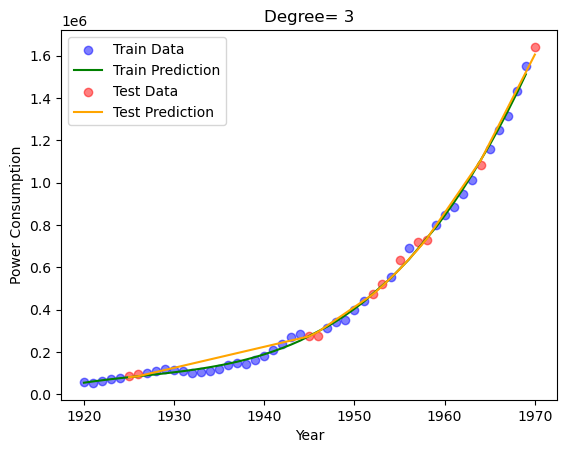

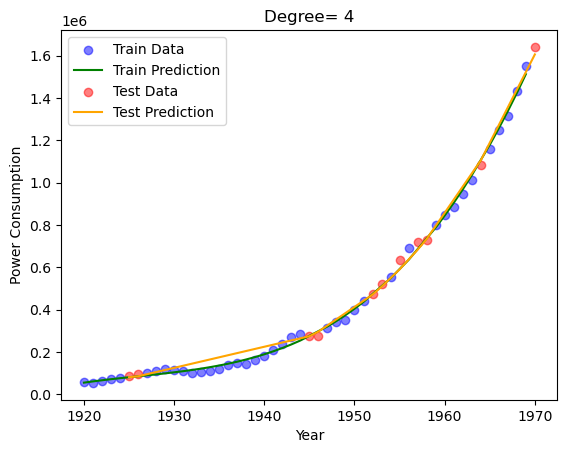

In [14]:
r2_train = []
r2_test = []
mse_train = []
mse_test = []
degrees = [1, 2, 3, 4]

for degree in degrees:
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)
        
        # Fit a linear regression model
        model = LinearRegression()
        model.fit(x_train_poly, y_train)

        # Make predictions on the train set
        y_train_pred = model.predict(x_train_poly)
    
        # Make predictions on the test set
        y_test_pred = model.predict(x_test_poly)

        # Calculate mean squared error for training data
        mse_train_data = mean_squared_error(y_train, y_train_pred)
        mse_train.append(mse_train_data)
    
        # Calculate mean squared error testing data
        mse_test_data = mean_squared_error(y_test, y_test_pred)
        mse_test.append(mse_test_data)

        # Calculate r square score for training data
        r_squared_train = r2_score(y_train, y_train_pred)
        r2_train.append(r_squared_train)
    
        # Calculate r square score for testing data
        r_squared_test = r2_score(y_test, y_test_pred)
        r2_test.append(r_squared_test)

        # Sort training data for plotting
        sorted_train_indices = np.argsort(x_train.ravel())
        x_train_sorted = x_train[sorted_train_indices]
        y_train_pred_sorted = y_train_pred[sorted_train_indices]
        
        # Sort test data for plotting
        sorted_test_indices = np.argsort(x_test.ravel())
        x_test_sorted = x_test[sorted_test_indices]
        y_test_pred_sorted = y_test_pred[sorted_test_indices]
        
        # Create the plot
        fig, ax = plt.subplots()
        ax.set_xlabel("Year")                                
        ax.set_ylabel("Power Consumption")
        ax.set_title("Degree= " + str(degree))
        
        # Plot train data
        ax.scatter(x_train, y_train, label="Train Data", color="blue", alpha=0.5)
        ax.plot(x_train_sorted, y_train_pred_sorted, label="Train Prediction", color="green")
        # The alpha parameter in a plotting function in Matplotlib controls the transparency of the plotted elements. It takes a value between 0 and 1:
        # Plot test data
        ax.scatter(x_test, y_test, label="Test Data", color="red", alpha=0.5)
        ax.plot(x_test_sorted, y_test_pred_sorted, label="Test Prediction", color="orange")
        
        ax.legend()
        plt.show()

In [29]:
def predict_power_consumption(year, degree):
    """
    Predict power consumption for a given year using a trained model and polynomial features.

    Parameters:
    - year (float or int): The year for which to predict power consumption.
    - degree (int): The degree of the polynomial model used.
    Returns:
    - float: Predicted power consumption.
    """

    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train)
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Transform the year into polynomial features
    year_poly = poly.transform([[year]])
    
    # Predict power consumption
    prediction = model.predict(year_poly)
    
    return prediction[0]

In [31]:
degree = 3
# Predict for a random year
random_year = 1921
predicted_consumption = predict_power_consumption(random_year, degree)

print(f"Predicted power consumption for the year {random_year}: {predicted_consumption:.2f}")

Predicted power consumption for the year 1921: 60628.14


In [33]:
print('r2 score for train data:',r2_train)
print('r2 score for test data:',r2_test)
print('mse for train data:',mse_train)
print('mse for train data:',mse_test)

r2 score for train data: [0.8482824752596967, 0.9905785028212584, 0.998262636877698, 0.9982689358230505]
r2 score for test data: [0.7745956697469626, 0.9855949971165306, 0.9973295250622782, 0.9973379208885806]
mse for train data: [28824413252.186737, 1789965454.5459278, 330077047.40809333, 328880327.35740954]
mse for train data: [43136205169.60873, 2756722371.5382266, 511055642.4738972, 509448911.64693946]
